In [1]:
import numpy as np
import pandas as pd
from project_lib import load_data, AnalysisCurvesDisplay

In [2]:
df = load_data()

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [4]:
X = df.drop('target', axis=1)
y = df.target

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, 
    stratify=y,
    test_size=23,
    random_state=131,
)

In [6]:
lg = LogisticRegression(max_iter=300).fit(x_train, y_train)

C:\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
lg.score(x_train, y_train), lg.score(x_test, y_test)

(0.8571428571428571, 0.8695652173913043)

In [8]:
dt = DecisionTreeClassifier(
    min_samples_leaf=5,
    random_state=44, 
    class_weight='balanced'
).fit(x_train, y_train)

In [9]:
dt.score(x_train, y_train), dt.score(x_test, y_test)

(0.8821428571428571, 0.8695652173913043)

In [10]:
svm = SVC(probability=True).fit(x_train, y_train)
svm.score(x_train, y_train), svm.score(x_test, y_test)

(0.6785714285714286, 0.6521739130434783)

In [11]:
res_dt = pd.DataFrame(
    dict(
        prob=dt.predict_proba(X)[:,1],
        target=y
    )
)

res_svm = pd.DataFrame(
    dict(
        prob=svm.predict_proba(X)[:,1],
        target=y
    )
)

res_lg = pd.DataFrame(
    dict(
        prob=lg.predict_proba(X)[:,1],
        target=y
    )
)

In [12]:
r = np.clip(
    np.array(y) * np.random.rand(len(y)) + np.random.rand(len(y)) * 0.5,
    a_min=0,
    a_max=1
)

ideal = pd.DataFrame(
    dict(
        prob=r,
        target=y
    )
)

In [13]:
dt_dis = AnalysisCurvesDisplay(res_dt, name='Decision Tree')
svm_dis = AnalysisCurvesDisplay(res_svm, name='SVM')
lg_dis = AnalysisCurvesDisplay(res_lg, name='Logistic Regression')
ideal_dis = AnalysisCurvesDisplay(ideal, name='ideal')

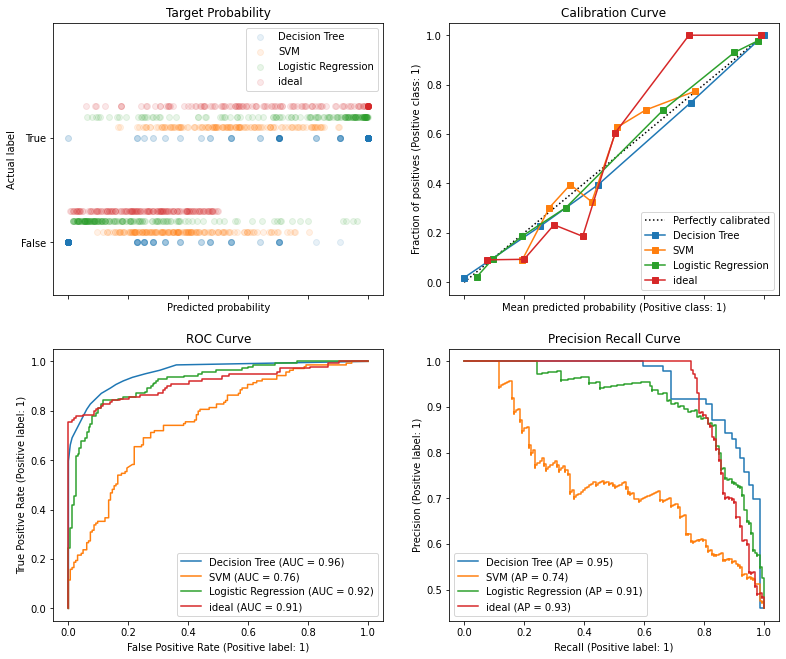

In [14]:
fig, axes = AnalysisCurvesDisplay.create_frames()
dt_dis.plot(*axes)
svm_dis.plot(*axes)
lg_dis.plot(*axes)
ideal_dis.plot(*axes)